In [1]:
# Imports
import pandas as pd

In [8]:
# Loading data from text file

iris_df = pd.read_csv('iris.data.txt', sep=",", header = None)

In [6]:
# Looking at the first 5 entries

iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Renaming the columns in the dataframe

iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width', 'class']
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Describing the iris dataset

iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# Function to describe categorical variables

def describe_categorical(X):
    """
    Just like .describe(), but returns the result
    for categorical variables only
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes=="object"]].describe().to_html()))

In [15]:
# Describing the class column

describe_categorical(iris_df)

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [16]:
# Importing graphing tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

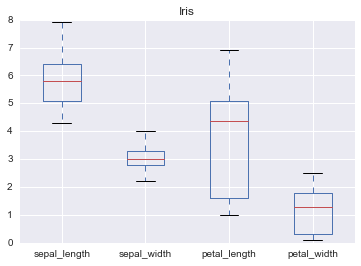

In [29]:
# Using box plots to get an idea of the measurements

iris_df.plot(kind="box", title="Iris", fontsize=10)

The average sepal length is higher than the average petal length. Usually the petals of flowers are longer than the sepals.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1029d56d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ba67a50>]], dtype=object)

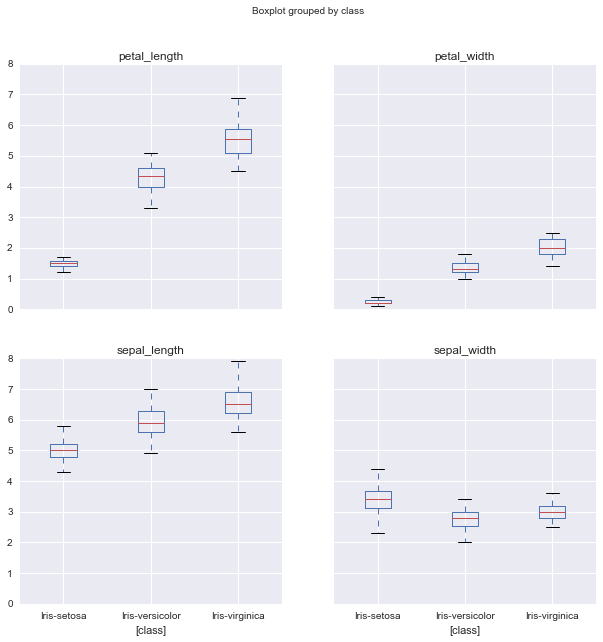

In [25]:
# Separating by class

iris_df.boxplot(by="class", figsize=(10,10))

Petals: Setosa's has the smallest petals in length and width. Virginica has the biggest petals. 

Sepals: Virginica has the biggest sepal length and setosa has the smallest. However setosa has the biggest sepal width. Then comes virginica and veriscolor

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11db48490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11dbafa10>]], dtype=object)

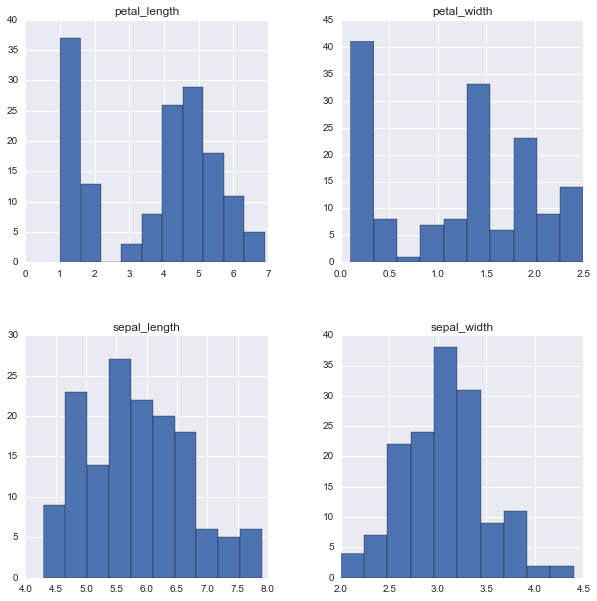

In [31]:
# Generating a histogram

iris_df.hist(figsize=(10,10))

sepal_length and sepal_width are almost a Gaussian distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ecae410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fb8ac50>]], dtype=object)

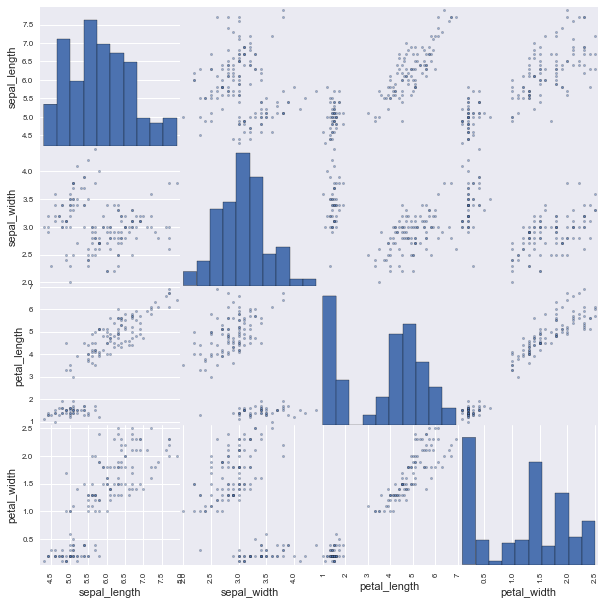

In [34]:
# Generating a scattermatrix to visualize correlation

from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris_df, figsize=(10,10))

There seems to be a linear correlation with petal_length and petal_width which makes sense. Surprisingly not much correlation with sepal_length and sepal_width. 

In [56]:
# Separating columns to get predictors and labels for a training and test set

from sklearn import cross_validation

X = iris_df.values[:,0:4]
Y = iris_df.values[:,4]

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size=.2, random_state=7)

In [47]:
# Importing algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [52]:
# The algortihms that I will be trying.

models = [('LR', LogisticRegression()),\
          ('LDA', LinearDiscriminantAnalysis()),\
          ('KNN', KNeighborsClassifier()),\
          ('CART', DecisionTreeClassifier()),\
          ('NB', GaussianNB()),\
          ('SVM', SVC())]

#??? Question: Why are you choosing these algorithms (advantages)?

#*** Answer: These six algorithms are used for classifing supervised data. At the moment, the best algorithm for 
#***         this particular dataset is not known so all six will be tried using cross-validation. The one with the 
#***         best accuray will be used.

In [57]:
# Applying cross-validation to all the algorithms in models

results=[]
names=[]
for name, model in models:
    kfold = cross_validation.KFold(n=len(X_train), \
                                   n_folds=10, \
                                   random_state=7)
    cv_results = cross_validation.cross_val_score(model,\
                                                  X_train,\
                                                  Y_train,\
                                                  cv=kfold,\
                                                  scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print msg

#??? Question: What is the difference between cv and k-fold cv?
#*** Answer: CV is the process of, after creating subsets of the data, then setting one aside as the test set, 
#***         fitting the algorithm on the others, using the fitted model on the test set, getting the error rate, 
#***         then repeat it for the number of subsets created while iterating through the subsets to be left 
#***         aside. Once each subset got a chance to be tested, then average the error rate. K-fold CV is when the 
#***         subsets created is specified so the process can be more efficient. 

#??? Question: What is the significance of random_state?
#*** Answer: random_state is just a number that is assigned to the process of generating a random number. That way the 
#***         outcomes can be reproducible as oppose to getting different random numbers.

#??? Question: How do you interpret the standard deviation?

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


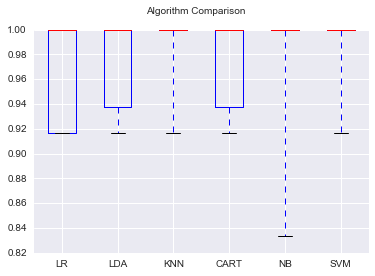

In [65]:
# Visually comparing the algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The SVM algorithm was the most accurate model from the other algorithms for the iris dataset. Therefore I will use the SVM algorithm to predict on the test set.

In [66]:
# Applying SVM on the test set

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svm_clf = SVC()
svm_clf.fit(X_train, Y_train)
predictions = svm_clf.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

#??? What is a confusion_matrix?
#??? What is a classification_report?

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
Iris-virginica       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30

